# Advertising Sales Channel Prediction

Sales Channel Prediction Case Study 

When a company enters a market, the distribution strategy and channel it uses are keys to its success in the market, as well as market know-how and customer knowledge and understanding. Because an effective distribution strategy under efficient supply-chain management opens doors for attaining competitive advantage and strong brand equity in the market, it is a component of the marketing mix that cannot be ignored . 

The distribution strategy and the channel design have to be right the first time. The case study of Sales channel includes the detailed study of TV, radio and newspaper channel. The company has to select proper sales channel to predict the right sales channel to generate good revenue.

In [1]:
##The objective is to predict the sales made based on money spent on different sales channels.
##Hence its a regression problem with Sales as the target variable

# Loading libraries and Dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt              #for plotting and EDA
import seaborn as sns                        #for plotting and Eda
from sklearn.model_selection import train_test_split         #for splitting dataset into train and test
from sklearn.metrics import r2_score                         #for model evaluation
from sklearn.metrics import mean_squared_error               #for model evaluation
from sklearn.linear_model import LinearRegression            #regression model
from sklearn.tree import DecisionTreeRegressor               #regression model
from sklearn.ensemble import RandomForestRegressor           #regression model
from sklearn.model_selection import cross_val_score          #for cross validating model
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('Advertising.csv')

In [4]:
df = pd.DataFrame(data = df)

In [5]:
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [6]:
df.shape

(200, 5)

The dataset is not very big

In [7]:
df.dtypes                               #for checking the data types of all the columns present

Unnamed: 0      int64
TV            float64
radio         float64
newspaper     float64
sales         float64
dtype: object

All the columns are of float64 datatype and are continuous in nature

# Checking and treating missing values

In [8]:
df.isnull().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

No missing values present in the dataset

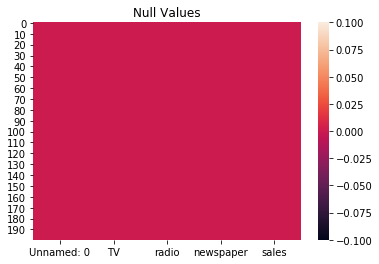

In [9]:
sns.heatmap(df.isnull())                                      #no null values present in dataset
plt.title('Null Values')
plt.show()

# Describing the dataset

In [10]:
df.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


The mean value of TV is 147.04 which is very close to its median which is 149.75. The range of TV is 0.70 - 296.40

The mean value of radio is 23.26 which is very close to its median which is 22.90. The range of radio is 0.0 - 49.60

The mean value of newspaper is 30.55 which is more than its median which is 25.75. The range of newspaper is 0.30 - 114.00

The mean value of sales is 14.02 which is around its median which is 12.90. The range of TV is 1.60 - 27.00

In [11]:
df.columns

Index(['Unnamed: 0', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')

# EDA and Data Visualisation

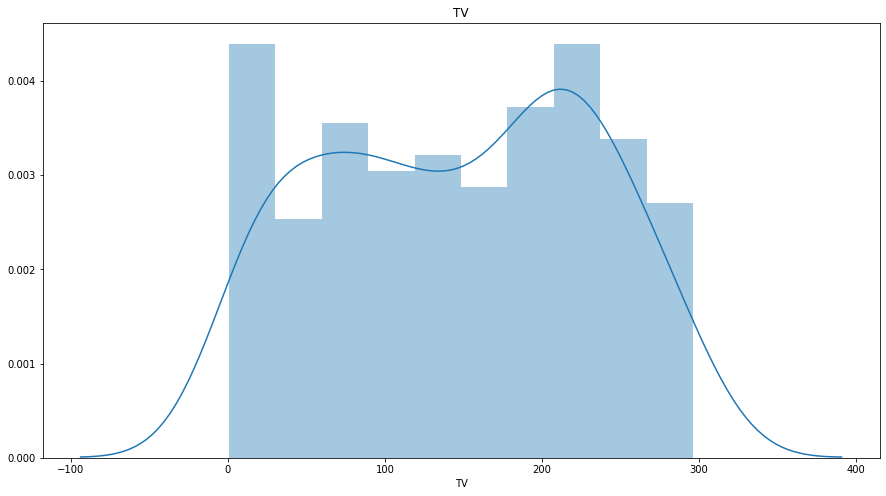

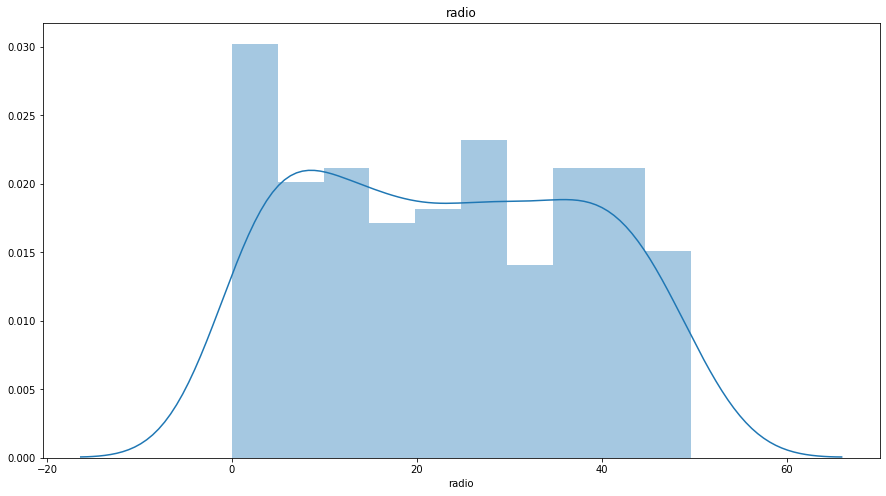

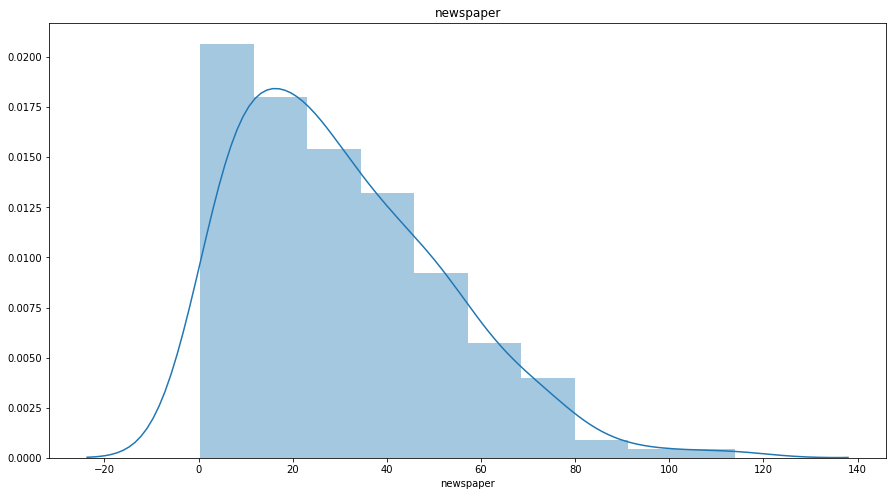

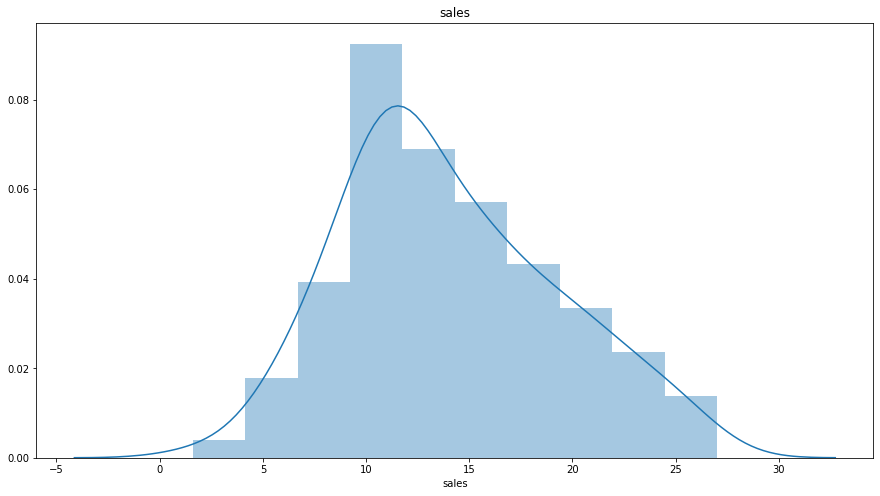

In [14]:
for i in df.columns[1:]:                                 #univariate analysis
    plt.figure(figsize = (15, 8))
    sns.distplot(df[i], bins = 10)
    plt.title(i)
    plt.show()

Observations from graphs:

The TV and radio graphs are more evenly spread

The newspaper graph experiences a steep decline, implying not much money is spent on advertising through newspaper

The sales graph is bell shaped

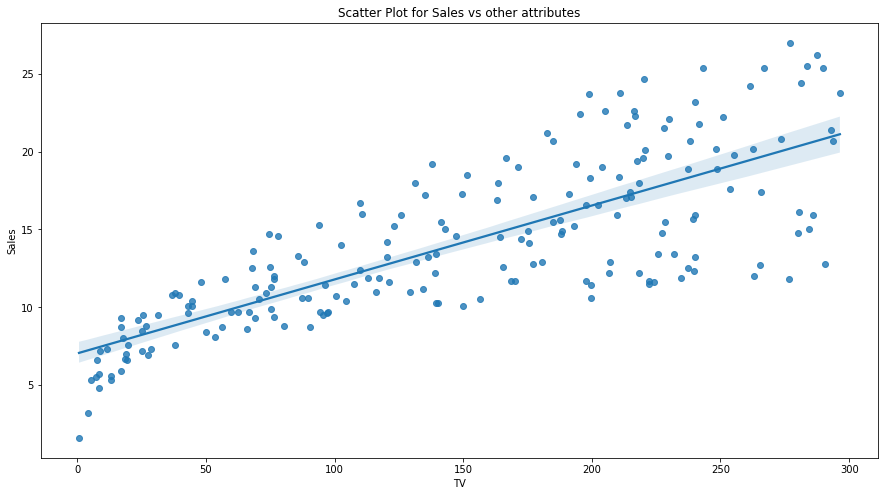

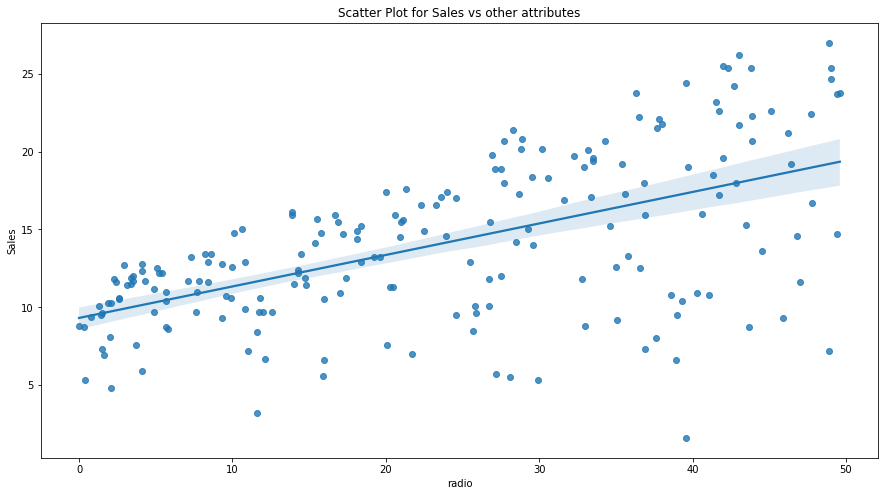

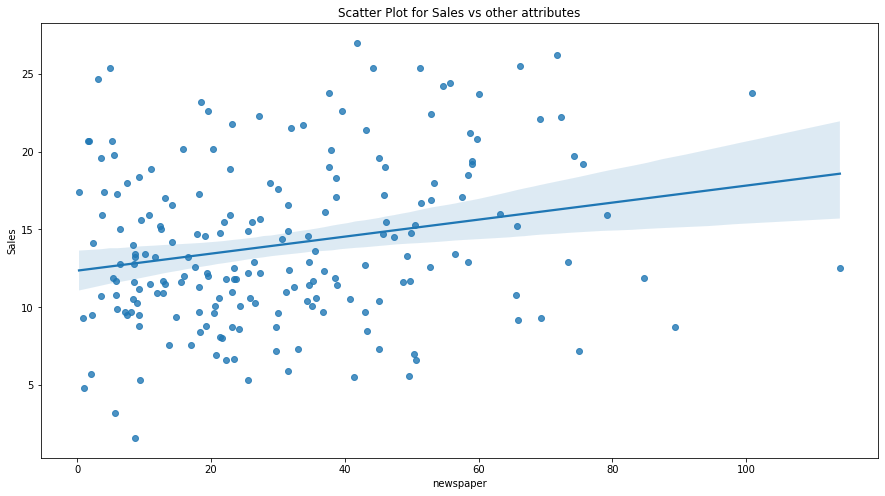

In [15]:
for i in df.columns[1:-1]:                                          #bivariate analysis
    plt.figure(figsize = (15, 8))
    sns.regplot(df[i], df['sales'])
    plt.title('Scatter Plot for Sales vs other attributes')
    plt.xlabel(i)
    plt.ylabel('Sales')
    plt.show()

Observations from the graphs:

There is a linear relation between TV and sales

There is somewhat linear relation between radio and sales but the graph is more spread

There doesn't seem to be a linear relation between sales and newspaper as graph is very spread.

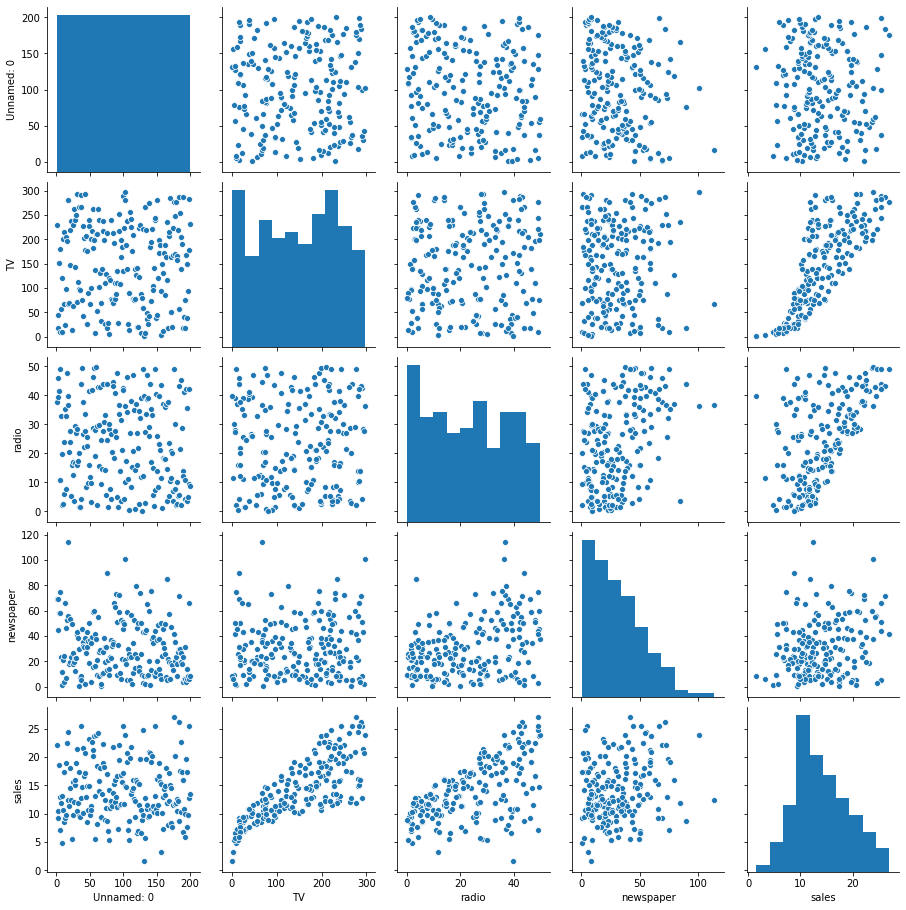

In [16]:
sns.pairplot(df)                             #multivariate analysis

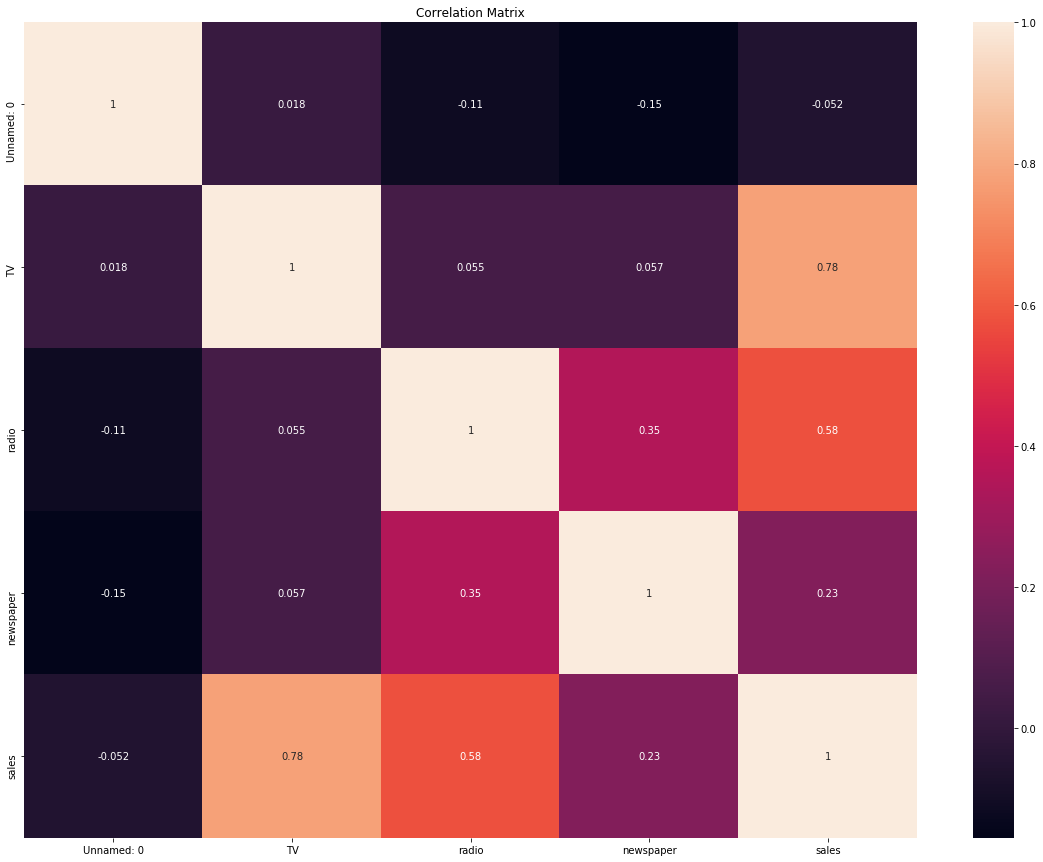

In [17]:
plt.figure(figsize = [20, 15])                             #multivariate analysis
sns.heatmap(df.corr(), annot = True)
plt.title('Correlation Matrix')
plt.show()

Observations from heatmap:

As we can see from the heatmap, TV has highest correlation with sales with 0.78.

Radio is also highly correlated with sales with 0.58.

Newspaper has the lowest correlation with sales at 0.23, less than half the correlation sales have with radio.

TV has very low correlation with other two columns (radio and newspaper) at 0.055 and 0.057 respectively.

# Outliers and Skewness

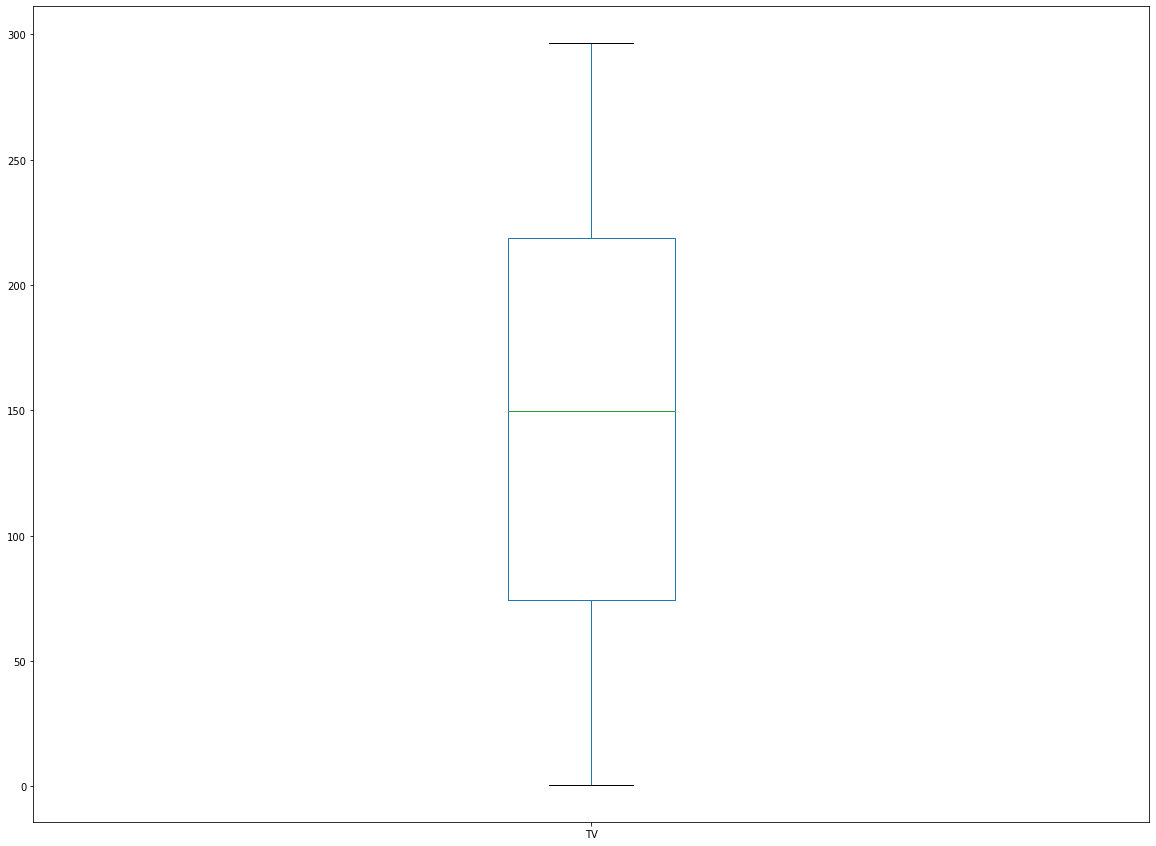

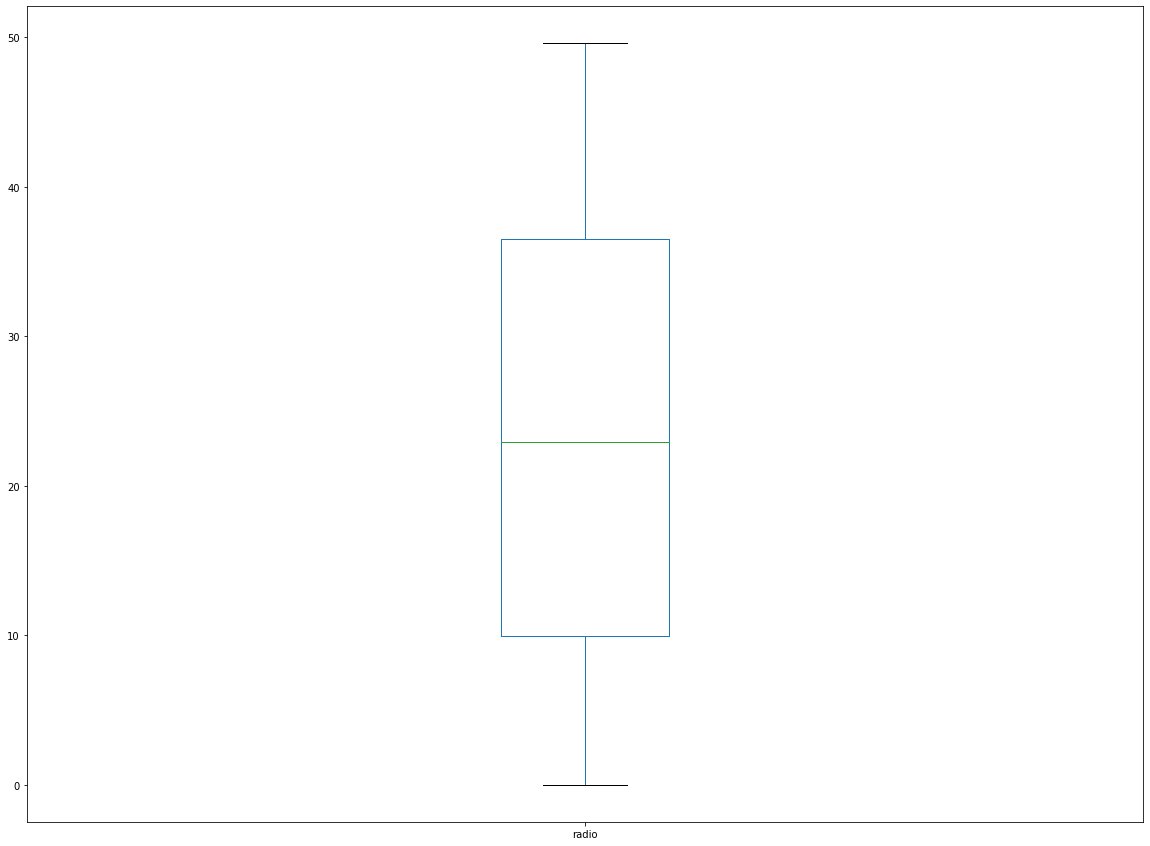

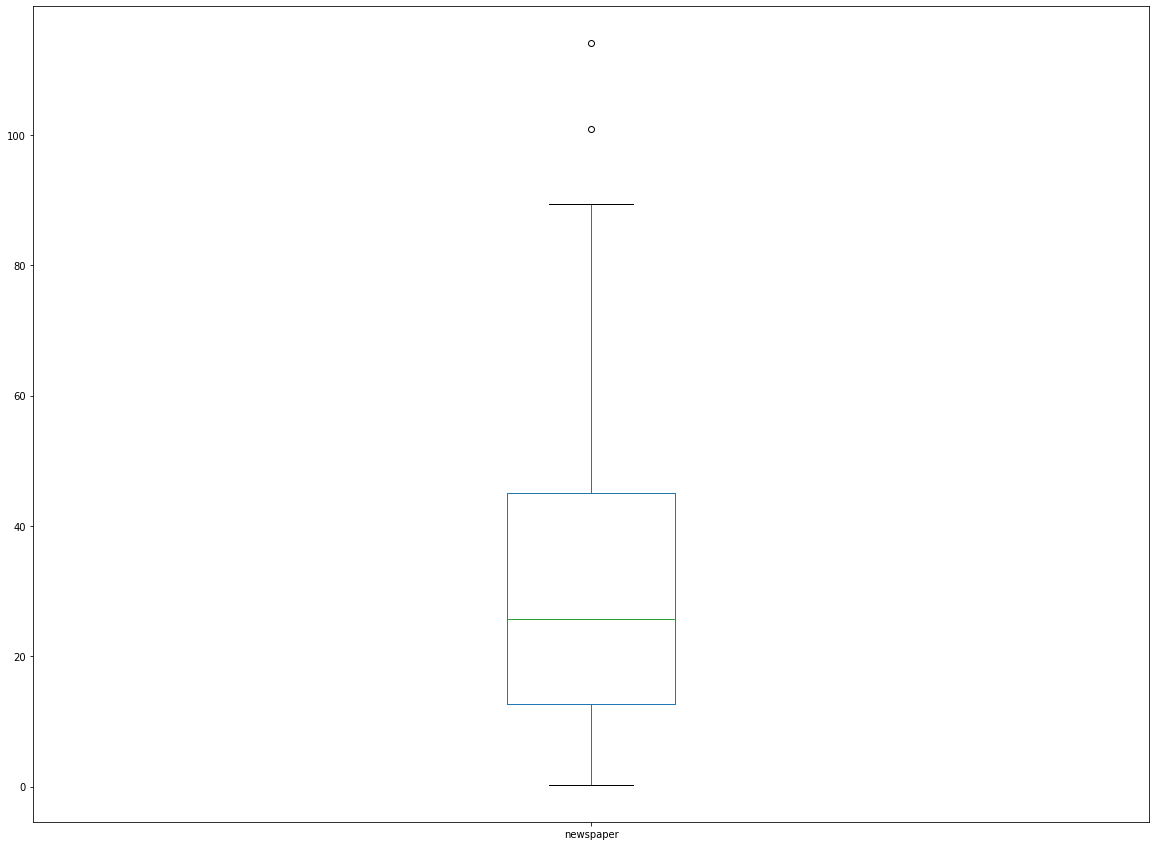

In [19]:
for i in df.columns[1:-1]:
    plt.figure(figsize = (20, 15))
    df[i].plot.box()

There are no outliers in TV and radio.

As for newspaper there are only 2 outliers which can be ignored.

As the dataset is very small, we must avoid removing values from the dataset.

In [20]:
df.skew()

Unnamed: 0    0.000000
TV           -0.069853
radio         0.094175
newspaper     0.894720
sales         0.407571
dtype: float64

Only newspaper has skewness higher than threshold value of 0.5.

In [21]:
df['newspaper'] = np.log(df['newspaper'])

In [22]:
df.skew()

Unnamed: 0    0.000000
TV           -0.069853
radio         0.094175
newspaper    -1.181239
sales         0.407571
dtype: float64

Skewness treated with log transformation.

# Separating columns into features and target

In [23]:
feat = ['TV', 'radio', 'newspaper']
x = df[feat]
y = df['sales']

# Best Random State

In [24]:
maxr2score = 0
maxRS = 0

for i in range (1, 500):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = i)
    LR = LinearRegression()
    LR.fit(x_train, y_train)
    predrf = LR.predict(x_test)
    r2 = r2_score(y_test, predrf)
    if r2>maxr2score:
        maxr2score = r2
        maxRS = i
print ('Max R2 score obtained is', maxr2score, 'on Random State', maxRS)

Max R2 score obtained is 0.9397819633783066 on Random State 154


# Creating Train Test Split

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 154)

In [26]:
LR = LinearRegression()
dt = DecisionTreeRegressor()
rf = RandomForestRegressor()

models = [LR, dt, rf]
for i in models:
    print (i)
    i.fit(x_train, y_train)
    pred = i.predict(x_test)
    print (r2_score(y_test, pred))
    print (mean_squared_error(y_test, pred))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
0.9397819633783066
1.8810206063400774
DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')
0.9639688156582253
1.1255
RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random

In [27]:
for i in models:
    cvs = cross_val_score(i, x, y, cv = 5)
    print ('Cross Validation Score for ',i, ' model is :', cvs.mean())
    print (' ')

Cross Validation Score for  LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)  model is : 0.8880462922246706
 
Cross Validation Score for  DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')  model is : 0.9541394664350312
 
Cross Validation Score for  RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
            

Random Forest model has the R2 score of 0.99 and cross validation mean of 0.98, hence it is the best model.

# Hypertuning

In [29]:
from sklearn.model_selection import GridSearchCV

In [30]:
rf.get_params

<bound method BaseEstimator.get_params of RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)>

In [31]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['mse', 'mae']
}

In [32]:
GCV = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 5)
GCV.fit(x_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [33]:
GCV.best_params_

{'criterion': 'mae',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 200}

In [34]:
rfr = RandomForestRegressor(random_state=42, max_features='auto', n_estimators= 200, max_depth=8, criterion='mae')
rfr.fit(x_train, y_train)
predrfr = rfr.predict(x_test)
print (r2_score(y_test, predrfr))
print (mean_squared_error(y_test, predrfr))

0.9851011526946598
0.4653927687500075


In [35]:
cvs = cross_val_score(rfr, x, y, cv = 5)
print ('Cross Validation Score for Random forest model after hypertuning is :', cvs.mean())

Cross Validation Score for Random forest model after hypertuning is : 0.9764919808148196


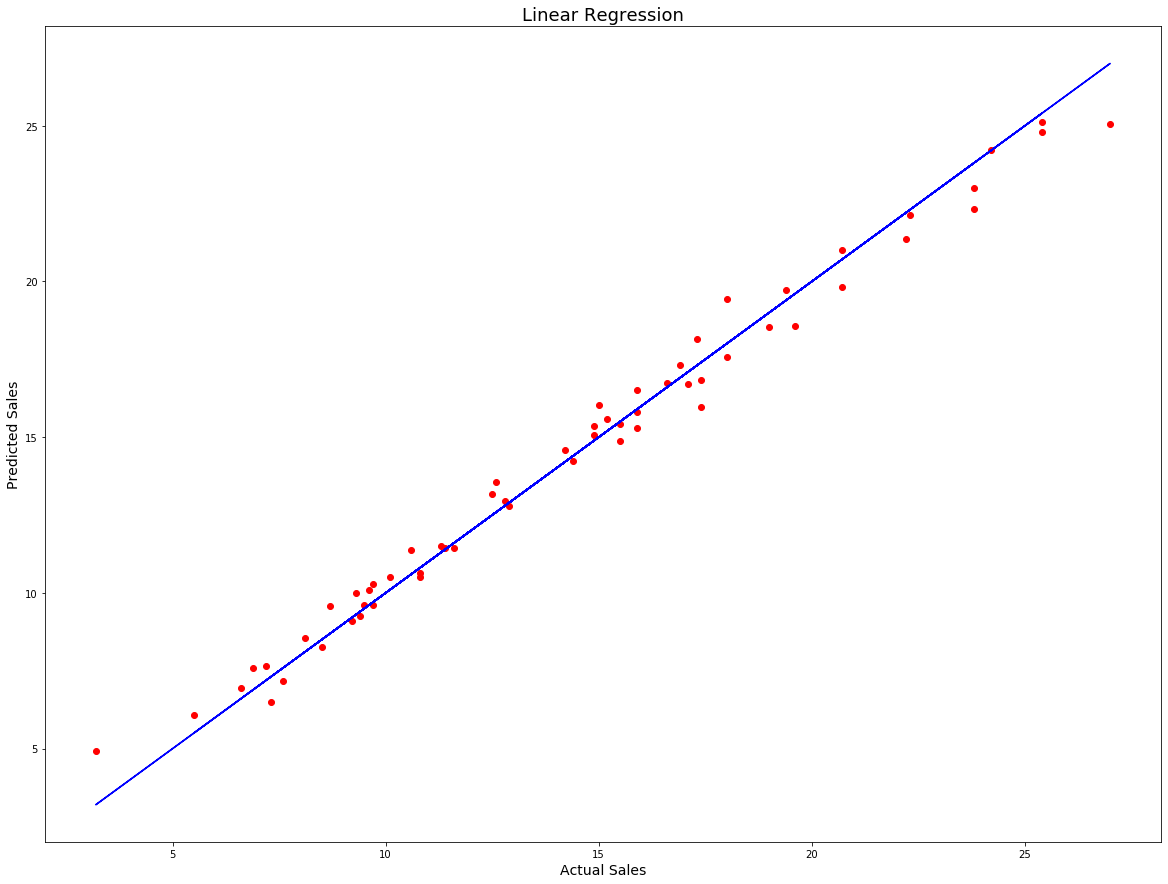

In [38]:
plt.figure(figsize = (20, 15))
plt.scatter(x = y_test, y = predrfr, color = 'r')
plt.plot(y_test, y_test, color = 'b')
plt.xlabel('Actual Sales', fontsize = 14)
plt.ylabel('Predicted Sales', fontsize = 14)
plt.title('Linear Regression', fontsize = 18)
plt.show()

The blue line represents the actual values while the red dotes are the predicted values

In [39]:
import pickle

filename = 'AdvertisingRfr.pkl'
pickle.dump(rfr, open(filename, 'wb'))

# Conclusion

In [40]:
loaded_model = pickle.load(open('AdvertisingRfr.pkl', 'rb'))
result = loaded_model.score(x_test, y_test)
print (result)

0.9851011526946598


In [41]:
conclusion = pd.DataFrame([loaded_model.predict(x_test)[:], predrfr[:]], index = ['Predicted', 'Original'])

In [42]:
conclusion

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
Predicted,15.6005,10.50725,4.92325,22.993,9.57125,17.3325,19.7295,22.335,7.5885,15.2945,...,21.352,15.34825,6.93325,12.96775,15.80875,15.9705,25.10475,21.01075,14.2375,13.171
Original,15.6005,10.50725,4.92325,22.993,9.57125,17.3325,19.7295,22.335,7.5885,15.2945,...,21.352,15.34825,6.93325,12.96775,15.80875,15.9705,25.10475,21.01075,14.2375,13.171
